# Postprocess images for visualization

Here we take the thresholded images:
- +-1: thresholded at 0.01 uncorrected
- +-2: thresholded at 0.05 FDR

and retain only those uncorrected clusters, which are spatially contiguous with at least one FDR cluster/voxel.

In [2]:
from nilearn.image import new_img_like
from nilearn.image import index_img
from nilearn.regions import connected_regions
import numpy as np

def postproc_images(nifti_image):
    # Identify uncorrected clusters (intensity >= 1)
    data = nifti_image.get_fdata()
    clustermap, indices = connected_regions(img['PathA(XM)']['thres'], min_region_size=0, extract_type='connected_components', mask_img=mask)
    
    # Make a copy of the input image
    postproc_image = new_img_like(nifti_image, nifti_image.get_fdata())

    for i in range(clustermap.shape[3]):
        cluster_img = index_img(clustermap, i)
        print(np.max(cluster_img.get_fdata()))
        if np.max(cluster_img.get_fdata()) > 1:
            postproc_image.get_fdata()[cluster_img.get_fdata() > 0] = cluster_img.get_fdata()[cluster_img.get_fdata() > 0]
    
    return postproc_image

In [4]:
import nibabel as nib

dir_mediation = '/Users/tspisak/data/PIC_conditioning_withinsub_nodatalad/mediation_signflipped_signedquantile_results'
mask = nib.load(f'{dir_mediation}/../full_masked_10_percent.nii')
mask_data = mask.get_fdata()

contrast = [
    "PathA(XM)",
    "PathB(MY)",
    "Indirect(ACME)",
    "Direct(Total-Indirect)",
    "INST_mean",
    "CONDINST_mean",
    "INSTandCONDINST",
    ]
img_type = ['beta', 'thres', 'uncorr_logp', 'fdr_logq']

img = {}
for c in contrast:
    img[c] = {}
    for t in img_type:
        img[c][t] = nib.load(f'{dir_mediation}/{t}_{c}.nii.gz')

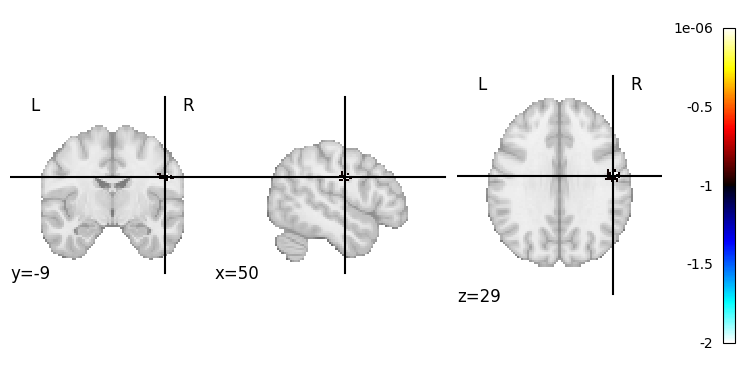

In [22]:
#plot clustermap with nilearn
from nilearn.plotting import plot_stat_map
from nilearn.image import index_img

# Select only the 1st volume from the 4D image
first_vol = index_img(clustermap, 5)
plot_stat_map(first_vol, colorbar=True)


In [24]:
# shape of clustermap
clustermap.shape



(91, 109, 91, 488)